In [25]:
#importing the data 

import pandas as pd
df=pd.read_csv("C:\\Users\\DELL\\Desktop\\Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure[Months],PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [26]:
#checking column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure[Months]', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
#customer id and payment method will not usefull for us thats why i am droping
data=df.drop(["customerID","PaymentMethod"],axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure[Months],PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,151.65,Yes


In [28]:
#checking for null values
x=data.isnull()
x.sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure[Months]      0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [29]:
"""
#checking is any punctuations
import string
string.punctuation
for i in string.punctuation:
    x=data.astype(str)==str(i)
    print(x.sum(),i)
    
"""

'\n#checking is any punctuations\nimport string\nstring.punctuation\nfor i in string.punctuation:\n    x=data.astype(str)==str(i)\n    print(x.sum(),i)\n    \n'

In [30]:
#getting dummies with labelencoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in data.columns:
    data[i]=le.fit_transform(data[i])
data

,gender,SeniorCitizen,Partner,Dependents,tenure[Months],PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,142,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,436,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,729,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,991,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1340,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,137,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,795,2660,1


<Figure size 720x720 with 0 Axes>

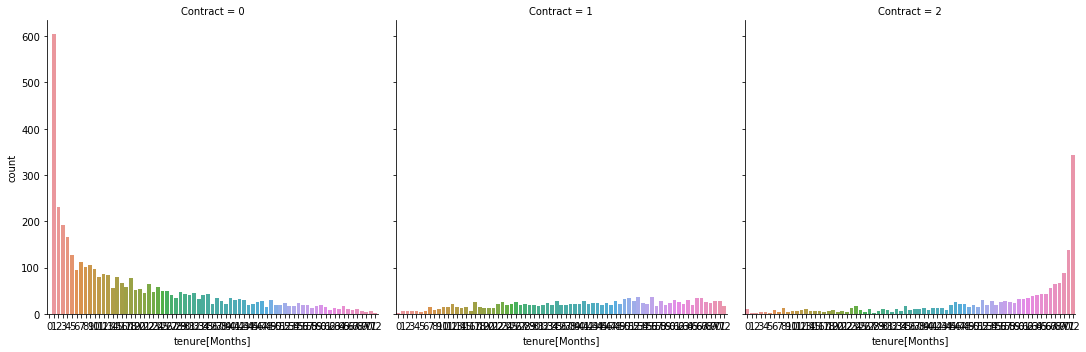

In [31]:
#analysing which customers are cant left[probably]
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.catplot("tenure[Months]",col="Contract",data=data,kind="count",aspect=1)
plt.show()

we can absorb from above graph that those who has less tenure and 
less contract they are high numbers and high tenure and high contract they are 
littile bit high so we can say that they are highly correlated 
and there is no chance to churn those who has correlated

In [33]:
#divinding the target and input columns
x_data=data.drop(["Churn"],axis=1)
y_data=data["Churn"]
data=x.values
target=y

Accuracy: 100%


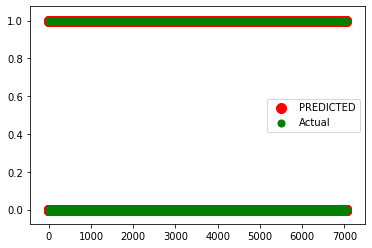

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,accuracy_score
def LogisticRegression(x,y,learning_rate):
    n=0
    epochs=len(x[0])
    while n<epochs:

        for i in range(len(x)):
            w=[0 for i in range(len(x[0]))]
            errors=[1 for i in range(len(y))]
            f=np.dot(w,x[i])
            z=1
            if f>z:
                yhat=1
            elif f==z:
                yhat=2
            elif f<z:
                yhat=0
            for j in range(len(w)):
                w[j]=w[j]+learning_rate*(y[i]-yhat)*(x[i][j])
            n+=1
        sse=[]
        for i in range(len(y)):
            errors[i]=(y[i]-yhat)**2
        sse.append(0.5*sum(errors))
        print("Accuracy:",str(int(accuracy_score(errors,y)*100))+"%")
        c=[i for i in range(len(y))]
        plt.scatter(c,errors,100,label="PREDICTED",color="red")
        plt.scatter(c,y,50,label="Actual",color="green")
        plt.legend()
x=data
y=target
learning_rate=0.1
LogisticRegression(x,y,learning_rate)            